<a href="https://colab.research.google.com/github/ArchismanSen21/ArchismanSen21/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

numpy is used for linear algebra and pandas is used for data processing and reading files.


In [ ]:
df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


df.head(5) shows the rows and columns of the file here the 5 in paarenthesis gives us 5 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

prints a consise summery of the dataset of its datatypes,non-null values and memeory size.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Seaborn used for statistical plotting and provides beautiful style and color palletes to make plots more beautiful. 
Matplotlib is used for data visualization. It is usually the first plotting liabrary learn by everyone.

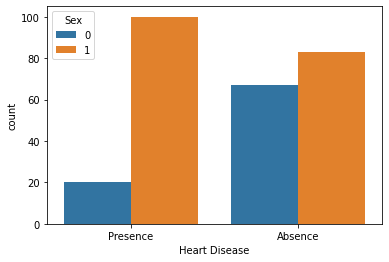

In [ ]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

countplot is used to show the observation in each categorial bin using bars.

Here the plot is between Heartdisease and Gender. We can see that males are more prone to heartdisease than woman.


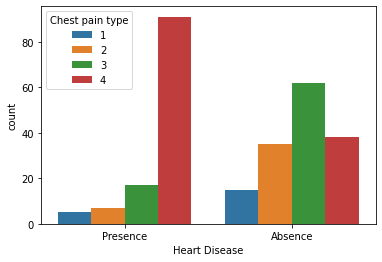

In [ ]:
sns.countplot(x=df['Heart Disease'],hue='Chest pain type',data=df)

Similarly here the people who suffering from type 4 cheast pain have more chances of heart disease.

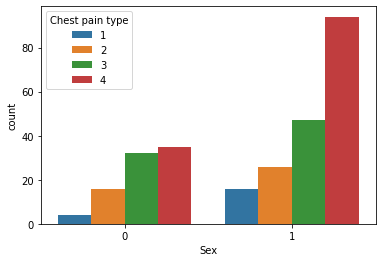

In [ ]:
sns.countplot(x=df['Sex'],hue='Chest pain type',data=df)

Now combining the two above plot we can see that more males suffer from cheast pain type 4 than woman.

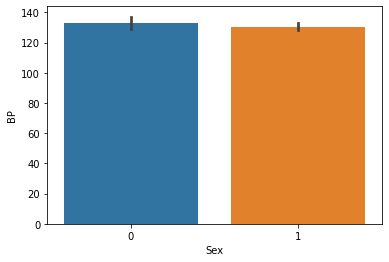

In [ ]:
sns.barplot(x=df['Sex'],y=df['BP'],data=df)

The blood pressure between gender is similar

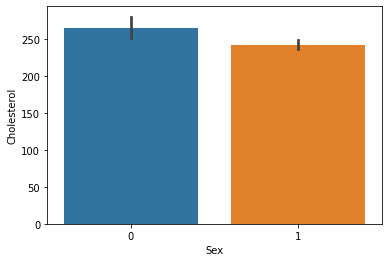

In [ ]:
sns.barplot(x=df['Sex'],y=df['Cholesterol'],data=df)

Feamales have little bit more choresterol than males. It occors because woman have gone through menopause and hence have lower estrogen levels

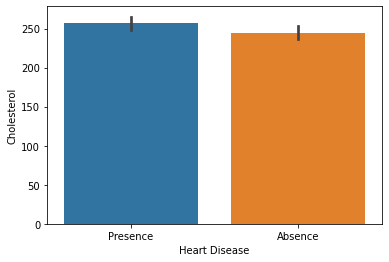

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['Cholesterol'],data=df)

Here we can see that having high choresterol makes a high risk for heart disease.

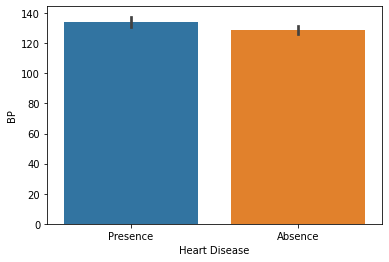

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['BP'],data=df)

Similarly too high blood pressure results in more chances of heart disease.

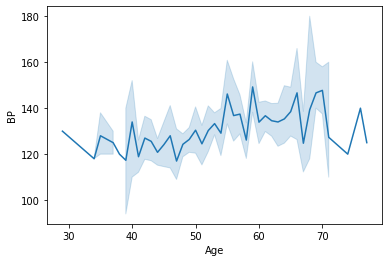

In [ ]:
sns.lineplot(x=df['Age'],y=df['BP'],data=df)

From the line plot we can see that the blood pressure is high at the age between 50 to 60

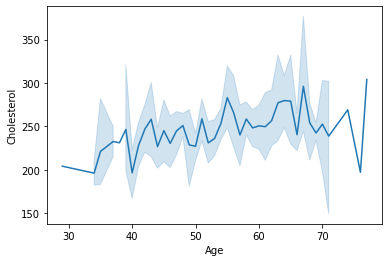

In [ ]:
sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

Choresterol is also high atht age group of 50 to 70.


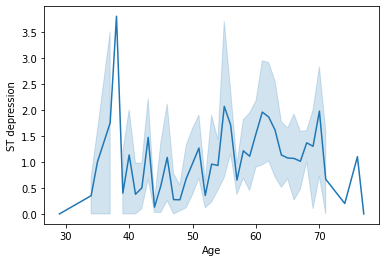

In [ ]:
sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)

The depression is at its highest in age range of 30 to 40

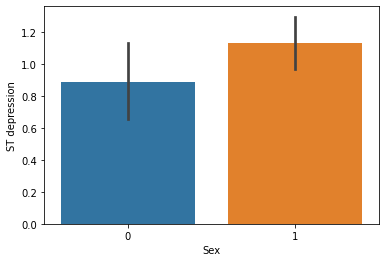

In [ ]:
sns.barplot(x=df['Sex'],y=df['ST depression'],data=df)

We can see that males are more prone to depression comared to females.

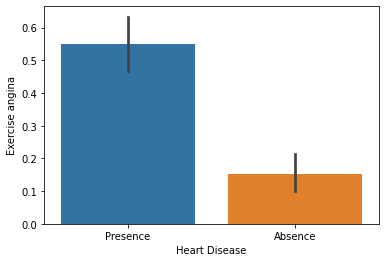

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['Exercise angina'],data=df)

person with high exercise angina has more chances of heart disease.

Exercise angina occurs because of inadequate blood flow to your heart. it might cause chest pain.

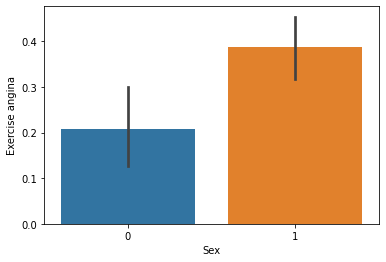

In [ ]:
sns.barplot(x=df['Sex'],y=df['Exercise angina'],data=df)

Also here we can see that males have high exercise angina.

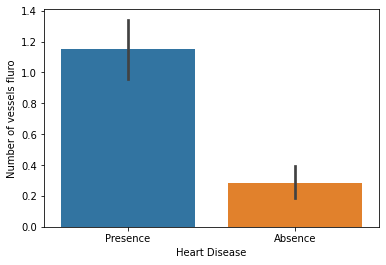

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['Number of vessels fluro'],data=df)

Having high  number of vessels fluro have high chanses of heart disease.

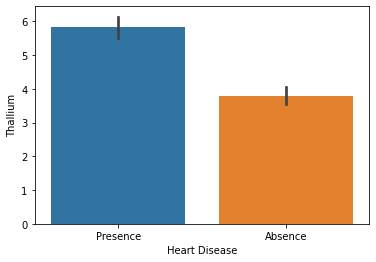

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['Thallium'],data=df)

High Thallium may lead to heart disease.

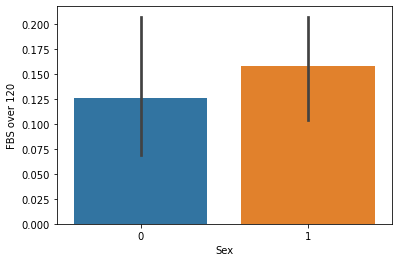

In [ ]:
sns.barplot(x=df['Sex'],y=df['FBS over 120'],data=df)

FBS stands for fasting blood sugar. So having fbs level over 120/ml causes hyperglycemia. Here it shows that males are more prone to it.

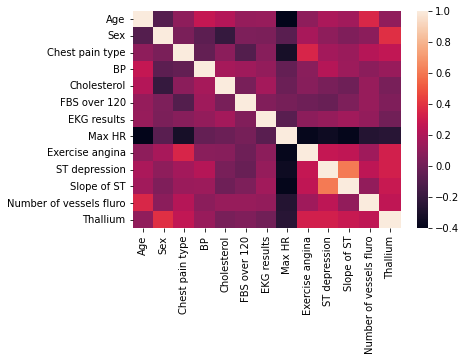

In [ ]:
sns.heatmap(df.corr())

Heatmap is a 2d data visualization where low value shows a low intensity color and high value shows in high intensity color format.

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])

labelEncoder can be used to normalize labels also used to transform non-nummerical labels to numberical labels.

StandardScaler standardise feature by removing the mean and scaling to unit variance.It is a mean based scaling method.

Fit_transform method is calculating the mean and variance of each of the feature present in the data.

In [ ]:
y=df['Heart Disease']
x=df.drop(['Heart Disease'],axis=1)

Y takes the heart disease column and X takes all of the columns except the Heart disease column

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

We split the dataset for train and tesing for the models. In multilevel classification this fuction compute subset accuracy i.e the set of labels predicted for a sample matches exactly with the set of labels.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

In [ ]:
max(list_1)

0.7037037037037037

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
print(score_1)

0.7777777777777778
